In [ ]:
!wget https://machinehack-be.s3.amazonaws.com/house_price_prediction_beat_the_benchmark/Participants_Data_HPP.zip

--2020-10-25 17:48:46--  https://machinehack-be.s3.amazonaws.com/house_price_prediction_beat_the_benchmark/Participants_Data_HPP.zip
Resolving machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)... 52.219.66.36
Connecting to machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)|52.219.66.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2179731 (2.1M) [application/zip]
Saving to: ‘Participants_Data_HPP.zip’

Participants_Data_H 100%[===================>]   2.08M  1.27MB/s    in 1.6s    

2020-10-25 17:48:49 (1.27 MB/s) - ‘Participants_Data_HPP.zip’ saved [2179731/2179731]



In [ ]:
!unzip Participants_Data_HPP.zip

Archive:  Participants_Data_HPP.zip
   creating: Participants_Data_HPP/
  inflating: Participants_Data_HPP/Test.csv  
  inflating: __MACOSX/Participants_Data_HPP/._Test.csv  
  inflating: Participants_Data_HPP/Train.csv  
  inflating: __MACOSX/Participants_Data_HPP/._Train.csv  
  inflating: Participants_Data_HPP/sample_submission.csv  
  inflating: __MACOSX/Participants_Data_HPP/._sample_submission.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train=pd.read_csv('Participants_Data_HPP/Train.csv')
test=pd.read_csv('Participants_Data_HPP/Test.csv')

In [ ]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(POSTED_BY                0
 UNDER_CONSTRUCTION       0
 RERA                     0
 BHK_NO.                  0
 BHK_OR_RK                0
 SQUARE_FT                0
 READY_TO_MOVE            0
 RESALE                   0
 ADDRESS                  0
 LONGITUDE                0
 LATITUDE                 0
 TARGET(PRICE_IN_LACS)    0
 dtype: int64, POSTED_BY             0
 UNDER_CONSTRUCTION    0
 RERA                  0
 BHK_NO.               0
 BHK_OR_RK             0
 SQUARE_FT             0
 READY_TO_MOVE         0
 RESALE                0
 ADDRESS               0
 LONGITUDE             0
 LATITUDE              0
 dtype: int64, (29451, 12), (68720, 11), POSTED_BY                 object
 UNDER_CONSTRUCTION         int64
 RERA                       int64
 BHK_NO.                    int64
 BHK_OR_RK                 object
 SQUARE_FT                float64
 READY_TO_MOVE              int64
 RESALE                     int64
 ADDRESS                   object
 LONGITUDE                flo

In [ ]:
df=train.append(test,ignore_index=True)

In [ ]:
df.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     19
BHK_OR_RK                    2
SQUARE_FT                48733
READY_TO_MOVE                2
RESALE                       2
ADDRESS                  13322
LONGITUDE                 6801
LATITUDE                  6803
TARGET(PRICE_IN_LACS)     1172
dtype: int64

In [ ]:
#df = pd.get_dummies(df, columns=['POSTED_BY','BHK_OR_RK'])

In [ ]:
df['ad_1'] = df['ADDRESS'].str.split(',').str[0]
df['ad_2'] = df['ADDRESS'].str.split(',').str[1]
df['ad_2'] = df['ad_2'].fillna('missingADDRESS')

In [ ]:
# back
x=[]
m=list(df['ad_2'])
for i in df['ad_2']:
  k=m.count(i)
  if k<3:
    x.append(i)
  else:
    pass

KeyboardInterrupt: ignored

In [ ]:
df['ad_2'].shape

(98171,)

In [ ]:
i=list(range(0, 98171))
df['title']=i

In [ ]:
import re
go_tags=df.copy()
temp=go_tags['ad_2'].str.split(',')

go_tags=go_tags.reindex(go_tags.index.repeat(temp.apply(len)))
go_tags['ad_2_new'] = np.hstack(temp)
go_tags=go_tags[['title','ad_2_new']]
go_tags=pd.crosstab(go_tags.title,go_tags.ad_2_new)
go_tags.head()

ad_2_new,,44 the cross,5 th Phase,52,66 Feet Road,A C Market,ASANSOL,Aakashwani,Achara,Adajan,Adambakkam,Adipur. 370205,Agra,Alapakkam,Aligarh,Aluva,Alwar bypass road,Alwarthirunagar,Ambattur,Amroli,Anakaputhur,Anand,Anand Colony,Andhra Bank Clny Avilal.,Anna Nagar,Anna nagar,Annapurna Road,Annapurna Society,Arekere,Arlem,Asansol,Athwalines,Atibelle Circle,Awadh Vikas Yojana,Ayanavaram,Ayodhya Nagar,BEHIND SECRETARIAT,BHAVNAGAR,BHINGAR,BTM 4th Stage,...,Wardha,Washim,Wayanad,West Tambaram,Whitefield,Yavatmal,ZAGADE WASTI,akshaya Towers,ambika township,avadh vihar yojna lko,barasat,boda bag,chas,deshaiphet Road,doddaballapur Road,jamnagar road,karjat,khammam Dist,kundrathur,lekhraj metro station,medavakkam,meherpur,mylapore,nandi Garden,near Post Office,near daivadnya bhavan,next to tata chrome,nr shendra area,opp To Nagarjuna Sch,palaniappa nagar,patuli,pratap nagar,rajkot,ranchi,sangowal,sector 4 plot no 22,sevoke road,umiyanagar2,vasant Vihar,yamuna Complex
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=df.merge(go_tags, on='title', how='left')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ad_1'] = le.fit_transform(df['ad_1'])
df['ad_1']=df['ad_1']+1
le = LabelEncoder()
df['ad_2'] = le.fit_transform(df['ad_2'])
df['ad_2']=df['ad_2']+1
del df['ADDRESS']

In [ ]:
#back
for i in df.columns:
  if i in x:
    del df[i]
  else:
    pass

In [ ]:
df['SQUARE_FT_r']=df['SQUARE_FT']/df['BHK_NO.']
df['SQUARE_FT_rrb']=df['SQUARE_FT']/(df['READY_TO_MOVE']+df['RESALE'])

In [ ]:
df['POSTED_BY'] = le.fit_transform(df['POSTED_BY'])
df['BHK_OR_RK'] = le.fit_transform(df['BHK_OR_RK'])

In [ ]:
train = df[df['TARGET(PRICE_IN_LACS)'].isnull()==False]
test = df[df['TARGET(PRICE_IN_LACS)'].isnull()==True]
del test['TARGET(PRICE_IN_LACS)']

In [ ]:
train_df=train.copy()
test_df=test.copy()

In [ ]:
train_df['TARGET(PRICE_IN_LACS)'] = np.log1p(train_df['TARGET(PRICE_IN_LACS)'])

In [ ]:
X = train_df.drop(labels=['TARGET(PRICE_IN_LACS)'], axis=1)
y = train_df['TARGET(PRICE_IN_LACS)'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((22088, 14), (22088,), (7363, 14), (7363,))

In [ ]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

# lgb

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 1000,
         'num_leaves': 69,
         'max_depth': -1,
         'min_data_in_leaf': 12,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 0.310793
[200]	valid_0's rmse: 0.297959


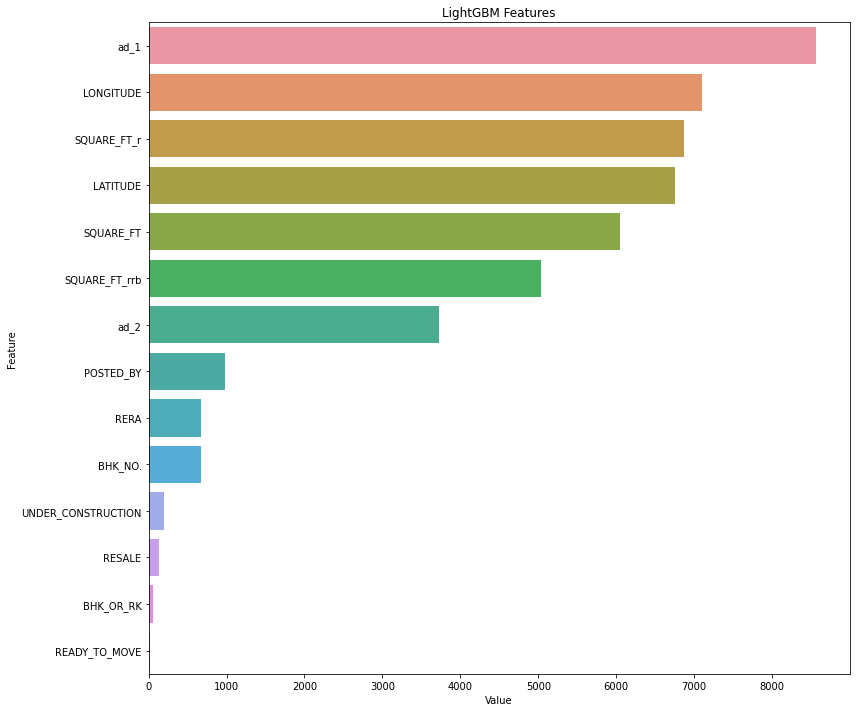

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:

from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.2970660868143401


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.29938305902686374


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.2916486399479148


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.28804408958733796


In [ ]:
np.mean(errlgb,0)

0.29403546884411413

In [ ]:
lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))
lgbm_final

array([  12.07904392,   81.59660029,   62.81175242, ..., 5795.20341755,
         86.96874862,  706.18225822])

In [ ]:
submission = pd.DataFrame({
        "TARGET(PRICE_IN_LACS)":lgbm_final
    })
submission.to_csv('./mhpno.csv', index=False)
print(submission)

       TARGET(PRICE_IN_LACS)
0                  12.079044
1                  81.596600
2                  62.811752
3                  28.705248
4                  16.263769
...                      ...
68715             112.455763
68716             122.576969
68717            5795.203418
68718              86.968749
68719             706.182258

[68720 rows x 1 columns]


# gb

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.1, n_estimators=1000, random_state=42, subsample=0.8)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred))))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.7123           0.0734           48.56s
         2           0.6356           0.0671           46.33s
         3           0.5799           0.0611           44.51s
         4           0.5339           0.0457           43.58s
         5           0.4915           0.0398           43.49s
         6           0.4499           0.0375           43.52s
         7           0.4223           0.0292           43.31s
         8           0.3999           0.0231           43.06s
         9           0.3730           0.0237           42.86s
        10           0.3551           0.0205           42.71s
        20           0.2433           0.0066           41.43s
        30           0.1985           0.0035           40.46s
        40           0.1794           0.0011           40.06s
        50           0.1677           0.0007           39.50s
        60           0.1607           0.0010           38.99s
       

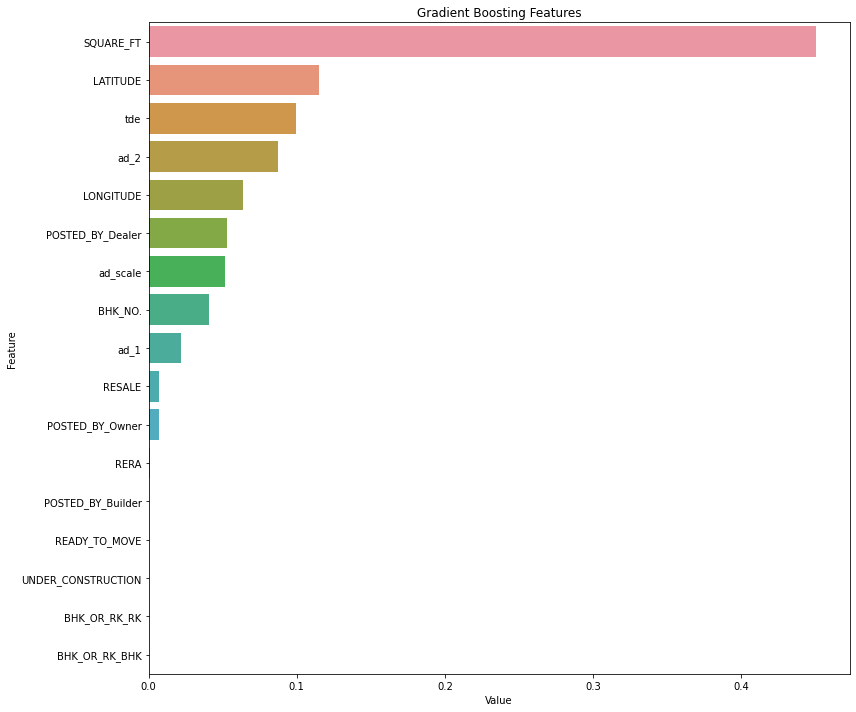

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:

from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.10, n_estimators=1000, random_state=42, subsample=0.8)
    #gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=650, random_state=42, subsample=0.8)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('MSE', sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred))))

    errgb.append(sqrt(mean_squared_log_error(np.exp(y_test),np.exp(y_pred))))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

MSE 0.30381398335051063
MSE 0.3238446525224199
MSE 0.3026467317687959
MSE 0.3138329748978811


In [ ]:
np.mean(errgb,0)

0.31103458563490194

In [ ]:
gb_fib = np.expm1(np.mean(y_pred_totgb,0))
gb_fib

array([  13.55556709,   78.69766039,   60.37362354, ..., 2120.18926625,
         82.60514661,  660.61749059])

# cat

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.2MB 56kB/s 


In [ ]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(verbose=100, #learning_rate=0.4, 
                        n_estimators=10000, random_state=42, subsample=0.9, task_type='GPU')
cat.fit(X_train, y_train)
y_pred = cat.predict(X_cv)
print('RMSLE', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred))))

Learning rate set to 0.019748
0:	learn: 0.8803204	total: 23.6ms	remaining: 3m 55s
100:	learn: 0.7432547	total: 1.28s	remaining: 2m 5s
200:	learn: 0.6196330	total: 2.51s	remaining: 2m 2s
300:	learn: 0.5433764	total: 3.71s	remaining: 1m 59s
400:	learn: 0.4814142	total: 4.97s	remaining: 1m 58s
500:	learn: 0.4478030	total: 6.22s	remaining: 1m 57s
600:	learn: 0.4272384	total: 7.49s	remaining: 1m 57s
700:	learn: 0.4147246	total: 8.88s	remaining: 1m 57s
800:	learn: 0.4068137	total: 10.2s	remaining: 1m 57s
900:	learn: 0.4015075	total: 11.4s	remaining: 1m 55s
1000:	learn: 0.3950634	total: 12.7s	remaining: 1m 54s
1100:	learn: 0.3904292	total: 13.9s	remaining: 1m 52s
1200:	learn: 0.3868131	total: 15.2s	remaining: 1m 51s
1300:	learn: 0.3823242	total: 16.5s	remaining: 1m 50s
1400:	learn: 0.3787953	total: 17.8s	remaining: 1m 49s
1500:	learn: 0.3765055	total: 19.1s	remaining: 1m 47s
1600:	learn: 0.3734711	total: 20.4s	remaining: 1m 46s
1700:	learn: 0.3707182	total: 21.7s	remaining: 1m 45s
1800:	learn

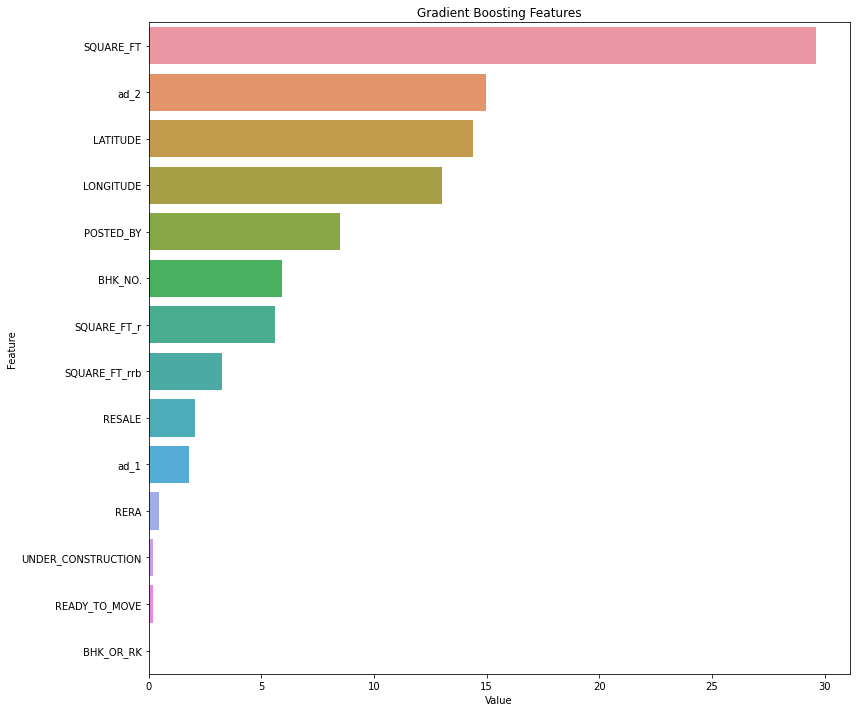

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest=test_df

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

errxgb = []
y_pred_totxgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #xgb = XGBRegressor(random_state=101)
    xgb=XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror', max_depth=9, n_estimators=1000,tree_method='gpu_hist')# )
    xgb.fit(X_train, y_train)

    y_pred_xgb = xgb.predict(X_test)
    print("RMSLE: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_xgb))))

    errxgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_xgb))))
    p = xgb.predict(Xtest)

    y_pred_totxgb.append(p)

RMSLE:  0.2841847887300769
RMSLE:  0.2887520500270837
RMSLE:  0.31860657989649716
RMSLE:  0.2859560267016793
RMSLE:  0.2905157635787913
RMSLE:  0.29403413830825825
RMSLE:  0.27470390996101557
RMSLE:  0.27980853675573264
RMSLE:  0.29950485124499404
RMSLE:  0.31402208473432686


In [ ]:
np.mean(errxgb,0)

0.2930088729938456

In [ ]:
final1 = np.expm1(np.mean(y_pred_totxgb,0))
final1

array([  11.557772,   82.26081 ,   72.21388 , ..., 9288.15    ,
         90.374725,  671.2682  ], dtype=float32)

In [ ]:
submission = pd.DataFrame({
        "TARGET(PRICE_IN_LACS)":final1
    })
submission.to_csv('./styl0e.csv', index=False)
print(submission)

       TARGET(PRICE_IN_LACS)
0                  11.557772
1                  82.260811
2                  72.213882
3                  27.553165
4                  15.237292
...                      ...
68715             119.570702
68716             122.453384
68717            9288.150391
68718              90.374725
68719             671.268188

[68720 rows x 1 columns]
